In [38]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
from pandas import read_csv
import matplotlib.patheffects as pe

In [39]:
def make_goal_card(title_text, action_time, flavor_text, good_or_bad, pvalue=0, icons=None):
    '''
    Generate the art for a science goal card.
    
    Parameters
    -----------
    title_text: str
        Title of Card
    action_time: str
        whether card is played immediately or saved for later
    pvalue: str
        point value of card
    flavor_text: str
        Description/flavor text of card
    pvalue: int
        Point value (optional)
    icons: bool
       Add circles for icons (optional)
    '''
    
    fig, ax = plt.subplots()
    fig.set_size_inches((2.5,3.5))
    
    #background
    if good_or_bad == 'bad':
        r = plt.Rectangle((0, 0), 1000, 1400, color='tab:red',zorder=1)
        ax.add_patch(r)
    
    else:        
        r = plt.Rectangle((0, 0), 1000, 1400, color='tab:blue',zorder=1)
        ax.add_patch(r)
    
    # Play time
    if action_time.lower() == 'immediate':
        action_time = 'immediately'
        r = plt.Rectangle((0, 900), 1000, 150, color='k',zorder=1)
        ax.add_patch(r)
        ax.text(500, 975, f'Play {action_time.title()}', ha='center', va='center', color='white',
                 fontsize=10, font='Georgia', fontweight='bold')
    else:
        r = plt.Rectangle((0, 900), 1000, 150, color='k',zorder=1)
        ax.add_patch(r)
        ax.text(500, 975, f'Play {action_time.title()}', ha='center', va='center', color='w',
                 fontsize=10, font='Georgia', fontweight='bold')


    # Title Text
    if len(title_text) > 10:
        title_text = '\n'.join(title_text.rsplit(' ', 1))

    txt = ax.text(50, 1350, f'{title_text}', ha='left', va='top', color='white',
                 fontsize=16, font='silom', fontweight='bold')
    
    # Flavor Text
    txt = ax.text(100, 850, f'{flavor_text}', 
            ha='left', va='top', color='white', wrap= True,
                 fontsize=8, font='Georgia')
    
    txt._get_wrap_line_width = lambda : 320.


    # Big circle for points
    if pvalue:
        circle1 = plt.Circle((500, 300), 200, color='white', alpha=0.5, zorder=1)
        ax.add_patch(circle1)
        ax.text(500, 275, f'{pvalue}', ha='center', va='center', color='k', fontsize=48, font='silom')

    #plt.text(500,475, f'{pvalue}', ha='center', va='center', fontsize=40, font='silom')
    #plt.text(500,365, 'points', ha='center', va='center', fontsize=8, font='georgia')

    
    # Add Circles for Icons
    if icons == True:
        circle1 = plt.Circle((275, 250), 200, color='white', alpha=0.5, zorder=1)
        circle2 = plt.Circle((725, 250), 200, color='white', alpha=0.5, zorder=1)
        ax.add_patch(circle1)
        ax.add_patch(circle2)
        ax.text(275, 225, '?', ha='center', va='center', color='k', fontsize=48, font='silom')
        ax.text(725, 225, '?', ha='center', va='center', color='k', fontsize=48, font='silom')
        
        
    # Additional Formatting
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1400)
    ax.set_axis_off()
    plt.axis('off')
    
    title_text = title_text.replace('\n', ' ')
    plt.savefig(f'final_cards/chaos_cards/CHAOS_{title_text.replace(" ", "")}.png', bbox_inches='tight', pad_inches=0.01, dpi=200)
    plt.show()

    

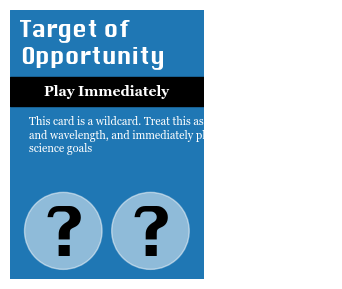

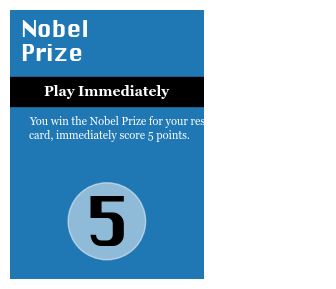

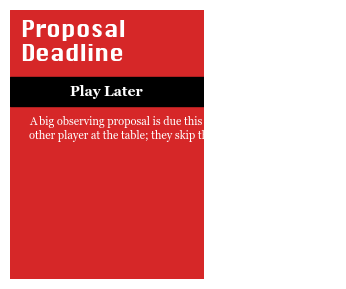

In [40]:
title ='Target of Opportunity'
action_time = 'immediately'
flavor_text = 'This card is a wildcard. Treat this as any target type, data type, and wavelength, and immediately play it towards one of your science goals'
make_goal_card(title, action_time, flavor_text, 'good', icons=True)


title ='Nobel Prize'
action_time = 'immediately'
flavor_text = 'You win the Nobel Prize for your resarch. When you play this card, immediately score 5 points. '
make_goal_card(title, action_time, flavor_text, 'good', pvalue=5)

title ='Proposal Deadline'
action_time = 'later'
flavor_text = 'A big observing proposal is due this week! Give this card to any other player at the table; they skip their next turn.'
make_goal_card(title, action_time, flavor_text, 'bad')


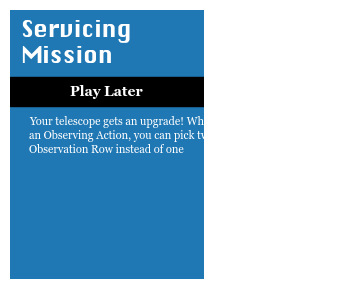

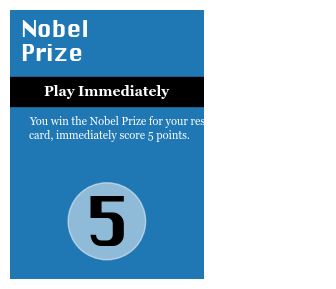

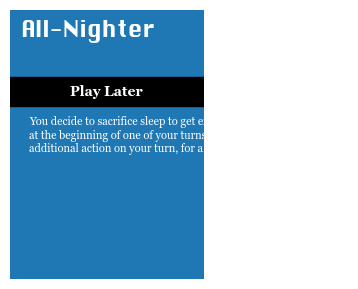

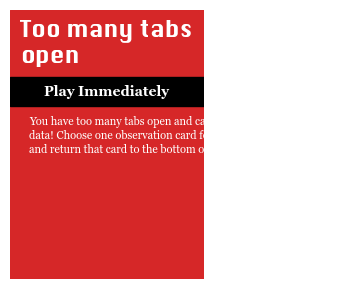

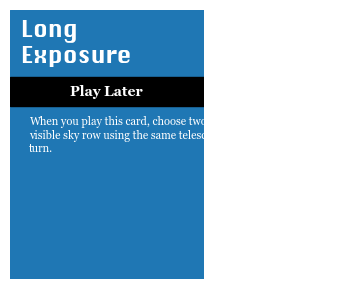

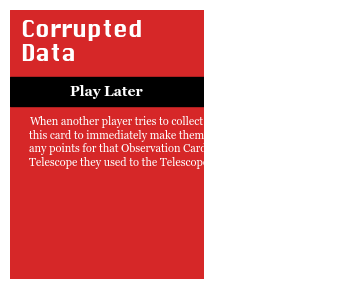

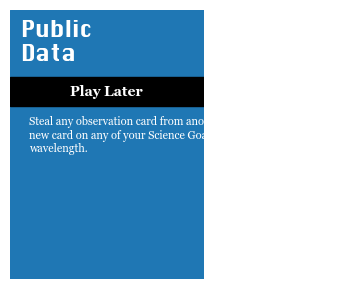

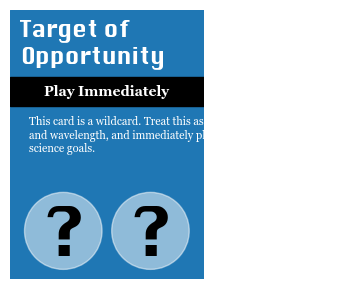

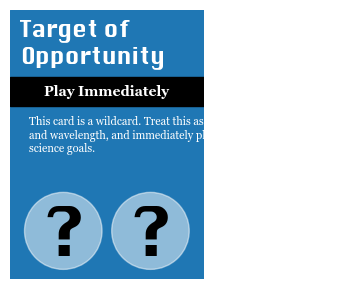

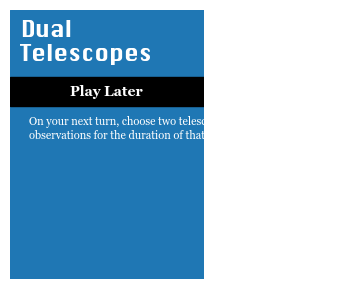

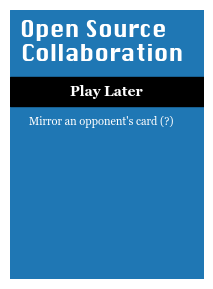

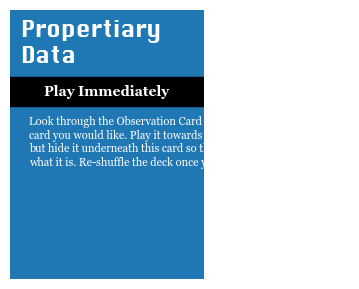

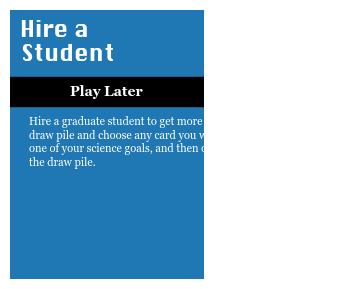

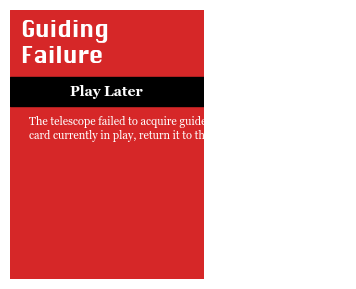

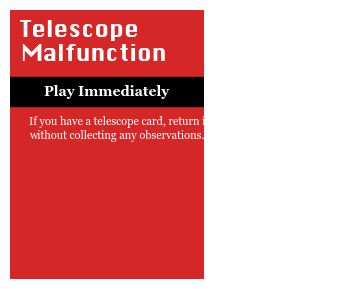

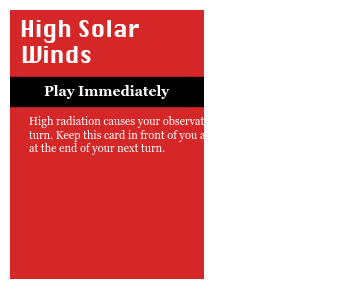

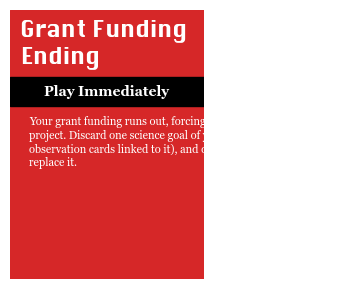

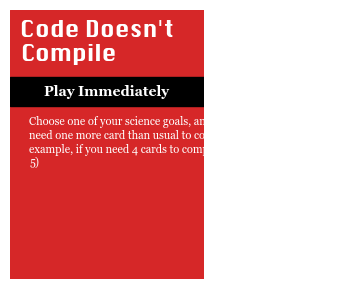

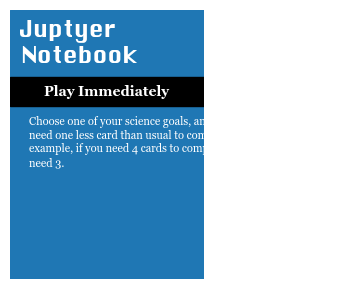

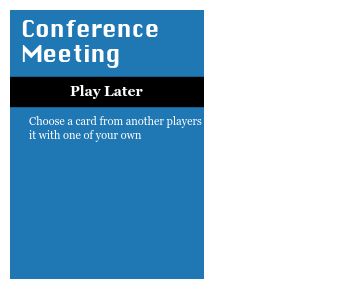

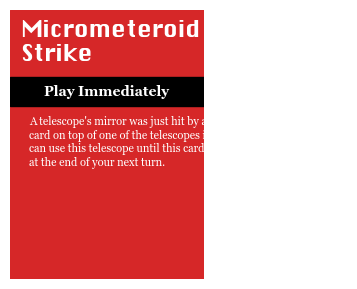

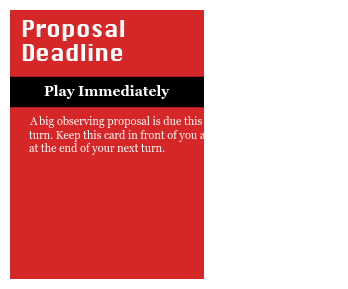

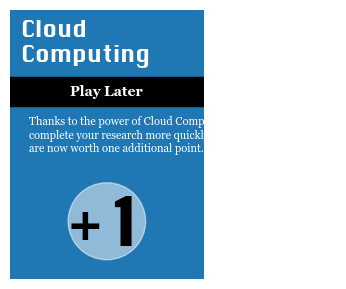

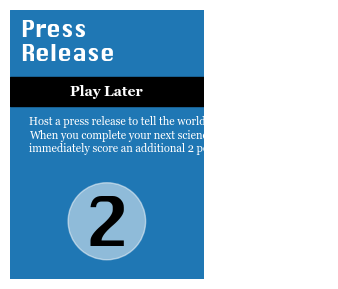

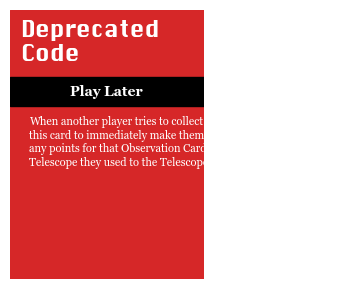

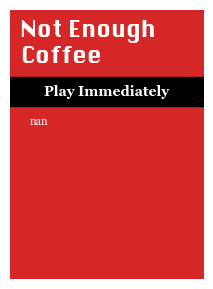

In [41]:
chaos_cards = read_csv('csv_files/chaos_cards.csv', dtype=str, comment='#')

for i,card in chaos_cards.iterrows():
    title = card['Card Name']
    action_time = card['act']
    flavor_text = card['Effect']
    good_or_bad =  card['good or bad?']
    card_layout = card['layout']
    if card_layout =='icons':
        make_goal_card(title, action_time, flavor_text, good_or_bad,icons=True)
    elif 'pvalue' in card_layout:
        make_goal_card(title, action_time, flavor_text, good_or_bad,pvalue=card_layout.split('=')[-1])
    else:
        make_goal_card(title, action_time, flavor_text, good_or_bad)
